# 📊 Exploratory Data Analysis — Insurance Portfolio

### Objectives:
- Understand data structure & quality
- Explore Loss Ratio patterns
- Analyze trends over time
- Examine risk factors: Vehicle, Province, Gender, ZipCode
- Generate insights with clear visualizations

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

## 1. Load Data

In [3]:
df = pd.read_parquet("../data/processed/insurance_data.parquet")
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01,True,Not specified,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01,True,Not specified,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01,True,Not specified,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01,True,Not specified,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01,True,Not specified,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


## 2. Data Structure & Summary

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   UnderwrittenCoverID       1000098 non-null  int64         
 1   PolicyID                  1000098 non-null  int64         
 2   TransactionMonth          1000098 non-null  datetime64[ns]
 3   IsVATRegistered           1000098 non-null  bool          
 4   Citizenship               1000098 non-null  object        
 5   LegalType                 1000098 non-null  object        
 6   Title                     1000098 non-null  object        
 7   Language                  1000098 non-null  object        
 8   Bank                      854137 non-null   object        
 9   AccountType               959866 non-null   object        
 10  MaritalStatus             991839 non-null   object        
 11  Gender                    990562 non-null   object

In [5]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
UnderwrittenCoverID,1000098.0,104817.546075,1.0,55143.0,94083.0,139190.0,301175.0,63293.708455
PolicyID,1000098.0,7956.68245,14.0,4500.0,7071.0,11077.0,23246.0,5290.03851
TransactionMonth,1000098,2015-02-28 10:49:29.147423744,2013-10-01 00:00:00,2015-01-01 00:00:00,2015-04-01 00:00:00,2015-06-01 00:00:00,2015-08-01 00:00:00,NaN
PostalCode,1000098.0,3020.600887,1.0,827.0,2000.0,4180.0,9870.0,2649.854413
mmcode,999546.0,54877704.020474,4041200.0,60056925.0,60058415.0,60058418.0,65065350.0,13603805.343562
RegistrationYear,1000098.0,2010.225371,1987.0,2008.0,2011.0,2013.0,2015.0,3.261391
Cylinders,999546.0,4.046642,0.0,4.0,4.0,4.0,10.0,0.29402
cubiccapacity,999546.0,2466.743258,0.0,2237.0,2694.0,2694.0,12880.0,442.80064
kilowatts,999546.0,97.207919,0.0,75.0,111.0,111.0,309.0,19.393256
NumberOfDoors,999546.0,4.01925,0.0,4.0,4.0,4.0,6.0,0.468314


## 3. Data Quality — Missing Values

In [6]:
missing = df.isna().mean().sort_values(ascending=False) * 100
missing

NumberOfVehiclesInFleet     100.000000
CrossBorder                  99.930207
CustomValueEstimate          77.956560
Rebuilt                      64.183810
Converted                    64.183810
WrittenOff                   64.183810
NewVehicle                   15.327998
Bank                         14.594670
AccountType                   4.022806
Gender                        0.953507
MaritalStatus                 0.825819
VehicleType                   0.055195
make                          0.055195
mmcode                        0.055195
Model                         0.055195
Cylinders                     0.055195
bodytype                      0.055195
kilowatts                     0.055195
NumberOfDoors                 0.055195
VehicleIntroDate              0.055195
cubiccapacity                 0.055195
CapitalOutstanding            0.000200
SubCrestaZone                 0.000000
ItemType                      0.000000
Province                      0.000000
Country                  

### Visualize Missingness

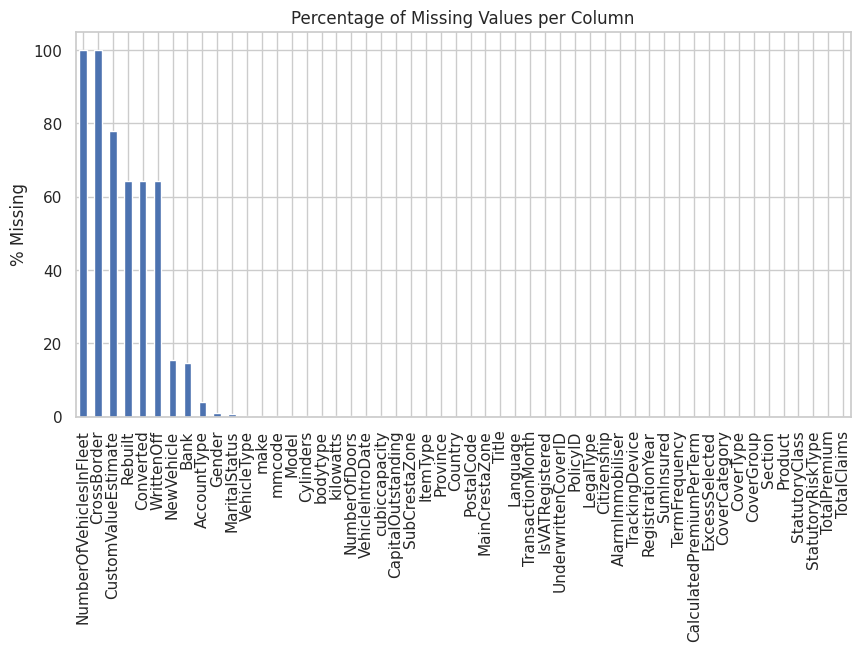

In [7]:
plt.figure(figsize=(10,5))
missing.plot(kind='bar')
plt.title("Percentage of Missing Values per Column")
plt.ylabel("% Missing")
plt.show()

## 4. Feature Engineering — Loss Ratio

In [8]:
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']
df['LossRatio'] = df['LossRatio'].clip(upper=5)  # cap extremely high values for stability
df[['TotalClaims', 'TotalPremium', 'LossRatio']].head()

,TotalClaims,TotalPremium,LossRatio
0,0.0,21.929825,0.0
1,0.0,21.929825,0.0
2,0.0,0.000000,NaN
3,0.0,512.848070,0.0
4,0.0,0.000000,NaN


## 5. Univariate Analysis

### Distribution of Premiums & Claims

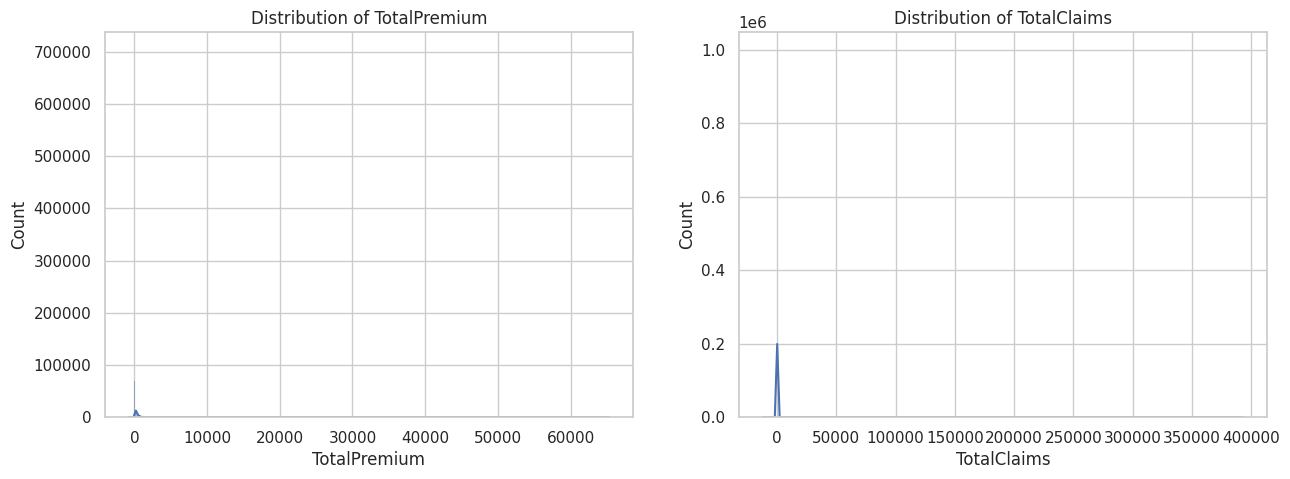

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.histplot(df['TotalPremium'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of TotalPremium')

sns.histplot(df['TotalClaims'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of TotalClaims')

plt.show()

### Categorical Variables — Gender, Province

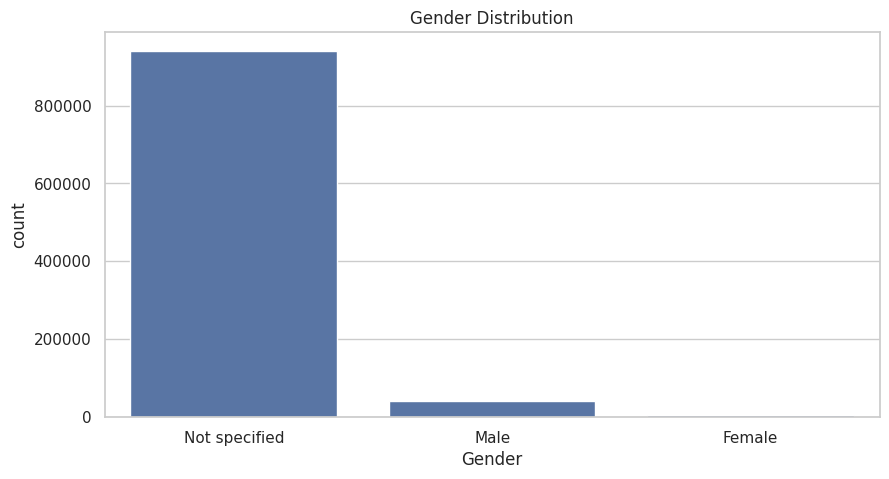

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Gender')
plt.title("Gender Distribution")
plt.show()

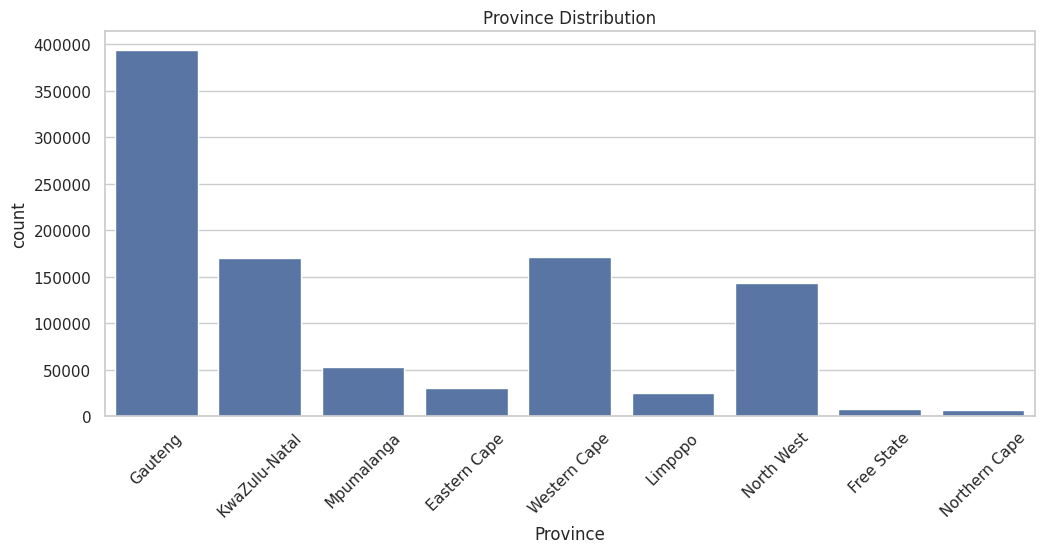

In [11]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='Province')
plt.title("Province Distribution")
plt.xticks(rotation=45)
plt.show()

## 6. Bivariate Analysis
### Loss Ratio by Province, Gender, VehicleType

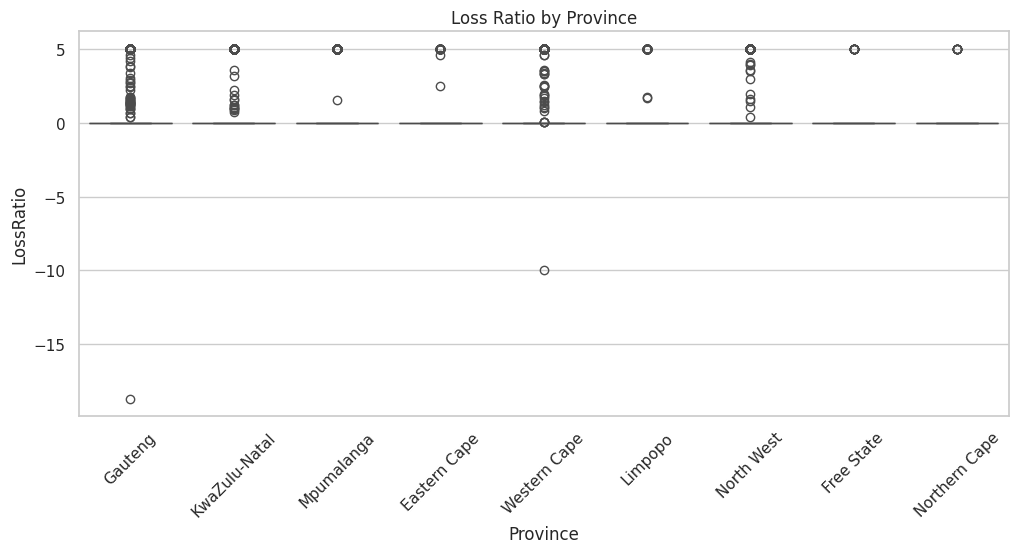

In [12]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x='Province', y='LossRatio')
plt.xticks(rotation=45)
plt.title("Loss Ratio by Province")
plt.show()

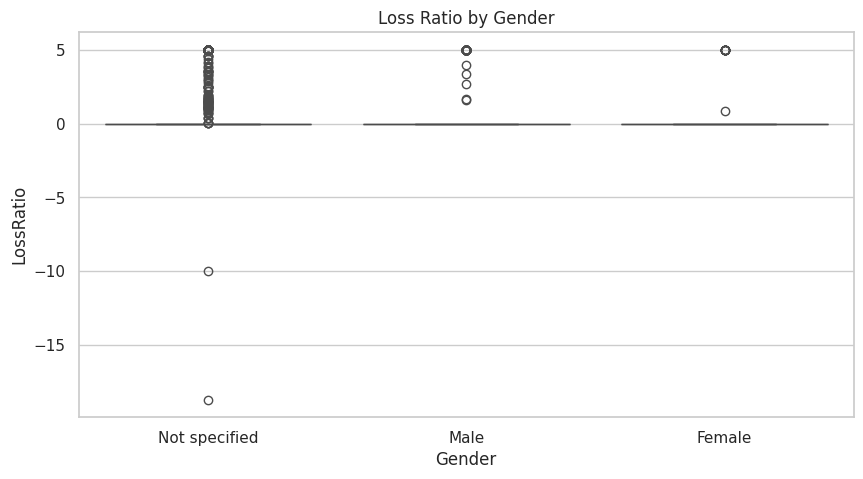

In [13]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Gender', y='LossRatio')
plt.title("Loss Ratio by Gender")
plt.show()

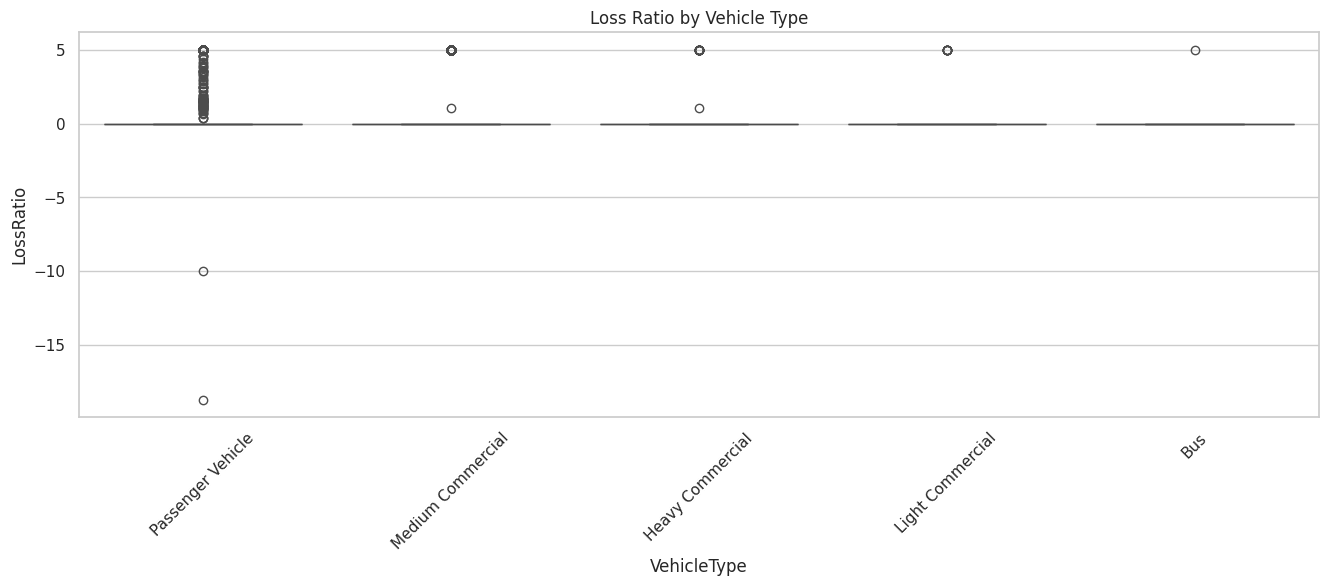

In [14]:
plt.figure(figsize=(16,5))
sns.boxplot(data=df, x='VehicleType', y='LossRatio')
plt.xticks(rotation=45)
plt.title("Loss Ratio by Vehicle Type")
plt.show()

## 7. Temporal Trends — Monthly Premiums & Claims

In [15]:
monthly = df.groupby(df['TransactionMonth'].dt.to_period('M')).agg({
    'TotalPremium': 'sum',
    'TotalClaims': 'sum'
}).astype(float)

monthly.index = monthly.index.to_timestamp()
monthly.head()

,TotalPremium,TotalClaims
TransactionMonth,,
2013-10-01,371.063512,0.000000
2013-11-01,21307.467009,50585.078947
2013-12-01,42484.748888,9283.385965
2014-01-01,54085.196865,12436.859649
2014-02-01,60788.436470,62989.307018


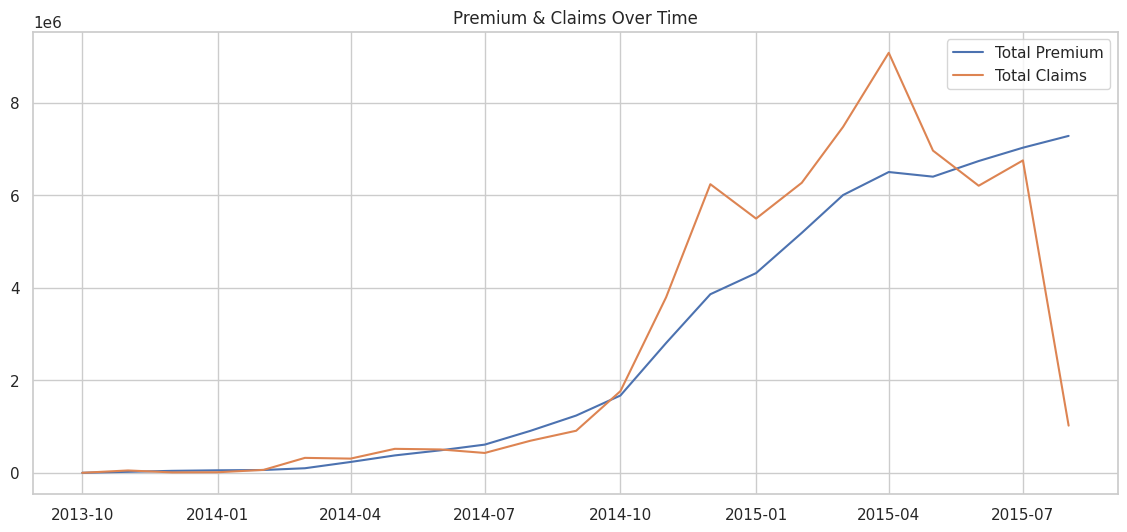

In [16]:
plt.figure(figsize=(14,6))
plt.plot(monthly.index, monthly['TotalPremium'], label='Total Premium')
plt.plot(monthly.index, monthly['TotalClaims'], label='Total Claims')
plt.title("Premium & Claims Over Time")
plt.legend()
plt.show()

## 8. Correlation Analysis

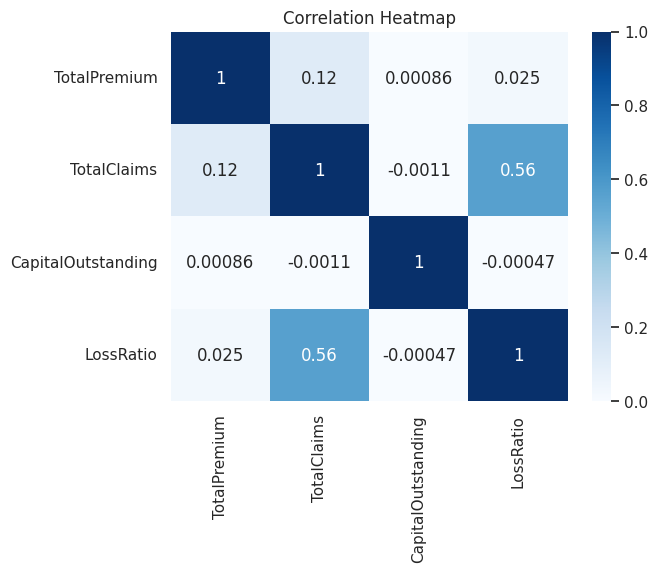

In [19]:
def to_numeric_safe(series):
    return (
        series.astype(str)
        .str.replace(".", "", regex=False)     # remove thousand separators
        .str.replace(",", ".", regex=False)    # convert decimal comma to dot
        .str.replace(" ", "", regex=False)     # remove spaces
        .replace(["None", "NONE", "none", ""], np.nan)
        .astype(float)
    )

numeric_cols = ["TotalPremium", "TotalClaims", "CapitalOutstanding"]

for col in numeric_cols:
    if df[col].dtype == object:
        df[col] = to_numeric_safe(df[col])

df["LossRatio"] = df["TotalClaims"] / df["TotalPremium"]


corr = df[['TotalPremium', 'TotalClaims', 'CapitalOutstanding', 'LossRatio']].corr()
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

## 9. Outlier Detection

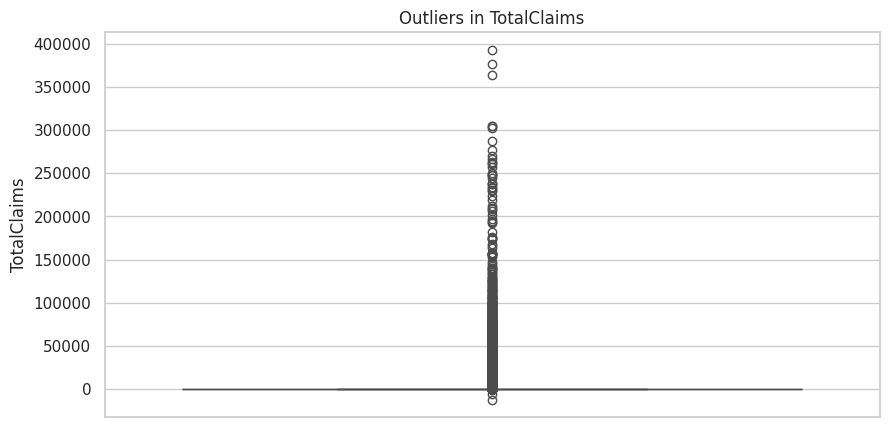

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, y='TotalClaims')
plt.title("Outliers in TotalClaims")
plt.show()

## 🎨 10. Creative Visuals — Key Insights
These satisfy the requirement for **creative & beautiful plots**.

---
### 10.1 Heatmap: Loss Ratio by Province × Vehicle Type

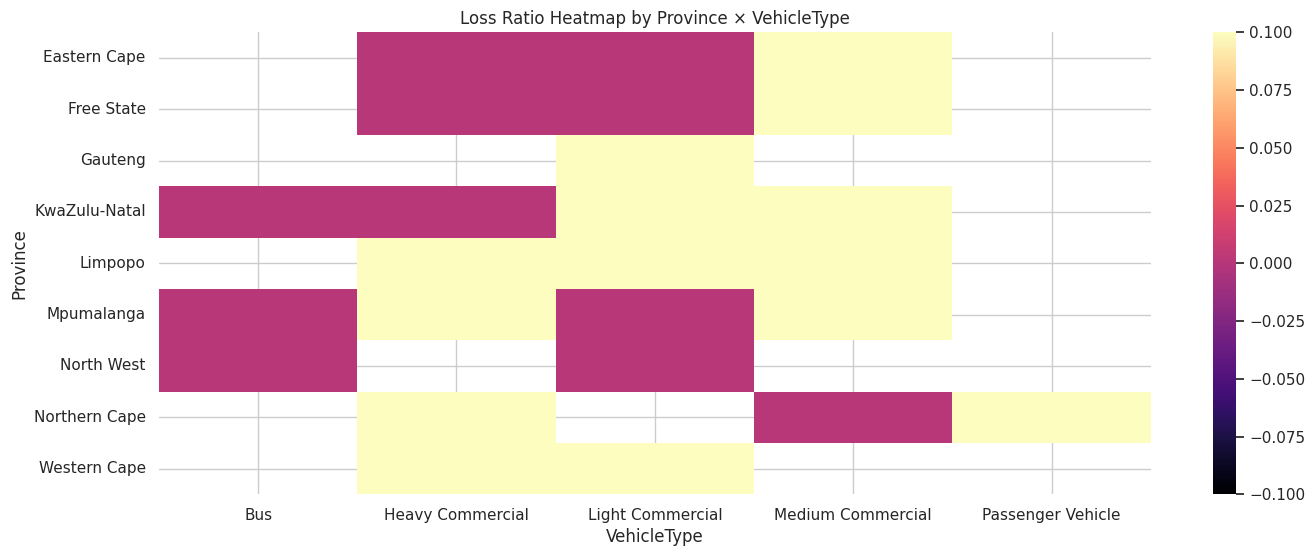

In [21]:
pivot = df.pivot_table(values='LossRatio', index='Province', columns='VehicleType', aggfunc='mean')
plt.figure(figsize=(16,6))
sns.heatmap(pivot, cmap='magma', annot=False)
plt.title("Loss Ratio Heatmap by Province × VehicleType")
plt.show()

### 10.2 Top 20 Vehicle Models with Highest Claim Severity

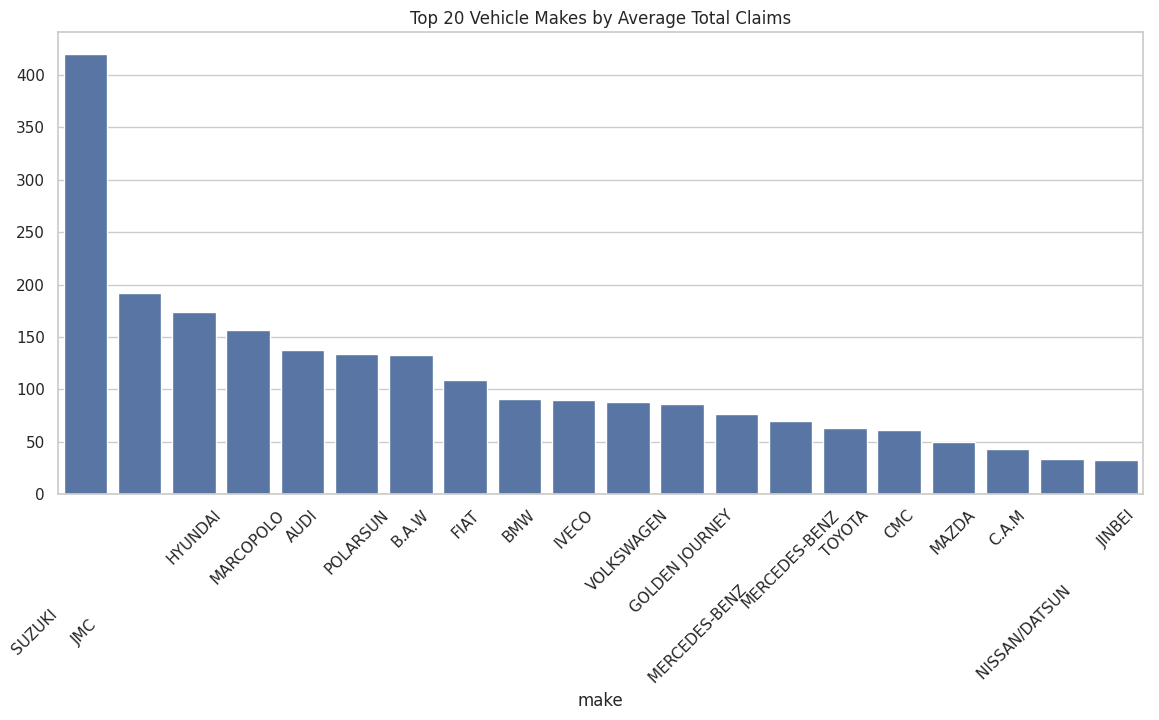

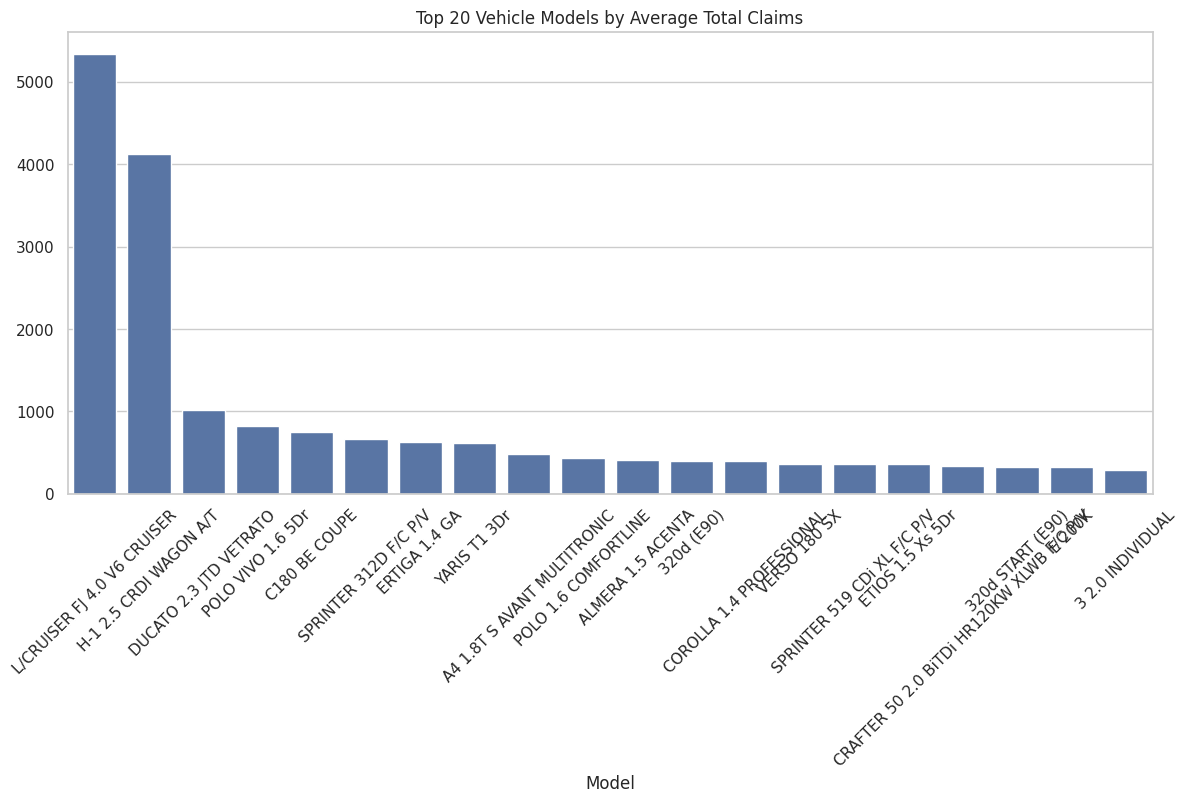

In [24]:
top_makes = df.groupby('make')['TotalClaims'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(14,6))
sns.barplot(x=top_makes.index, y=top_makes.values)
plt.title("Top 20 Vehicle Makes by Average Total Claims")
plt.xticks(rotation=45)
plt.show()

top_models = df.groupby('Model')['TotalClaims'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(14,6))
sns.barplot(x=top_models.index, y=top_models.values)
plt.title("Top 20 Vehicle Models by Average Total Claims")
plt.xticks(rotation=45)
plt.show()


### 10.3 Claim Severity vs Premium Scatterplot — Colored by Province

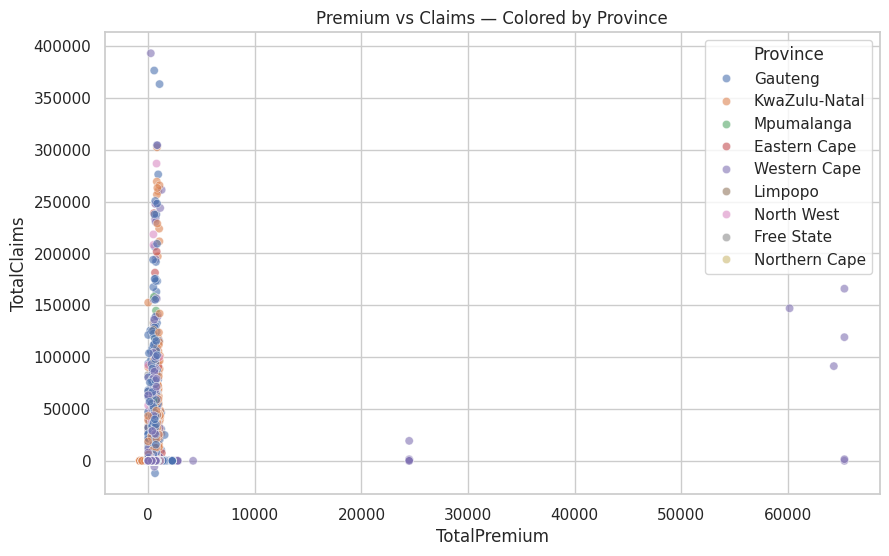

In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='TotalPremium', y='TotalClaims', hue='Province', alpha=0.6)
plt.title("Premium vs Claims — Colored by Province")
plt.show()